# Introduction

<b>Alexander Atzberger<br>
Student ID: 11354216<br>
Digital Analytics<br>
dr. T.B. Araujo<br>
18 October 2020<br>

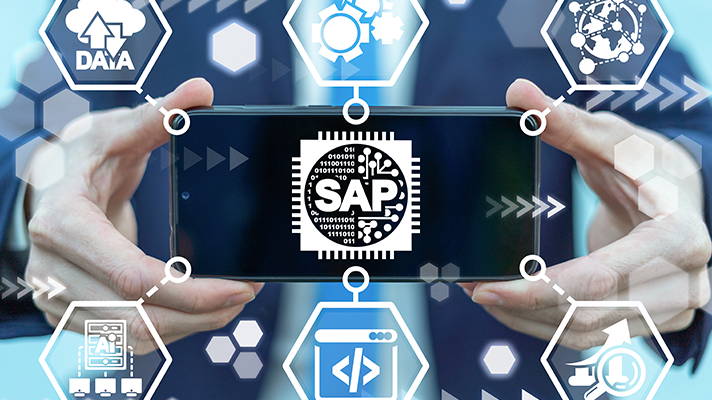

In [311]:
Image(filename = "SAP-topimage.png", width = 600, height = 300)

“The modern day business leader must be like the samurai - able to master the martial arts of business combat, but also able to learn the skills of the poet or philosopher” (Hamilton & Zeckhauser, 2004). Besides the monumental task of leading an organisation through a competitive landscape, the modern day leader needs to own multiple channels of communication: from internal communication, shareholder communication, crisis communication and much more. In a recent case, Tesla CEO Elon Musk received immense backlash after tweeting: “Tesla stock price is too high imo” (Siddiqui, 2020). The backlash was not only vocal coming from journalists, but arguably one of the key stakeholders of his organisation: a number of Tesla shareholders sold their shares resulting in the organisations stock to plument. All because of one tweet. In this case, Elon Musk is an outlier, having multiple innovative organisations pushing the fields of space travel, public transportation and the evolution of electric cars at the same time. With an audience of 39,2M followers as of October 2020 (Twitter, 2020), his reach is higher than the average CEO. Yet it is had to imagine that a an executives external communication has no effect on their organisation. What monetary, direct impact does social media activity of an executive have on its organisation? On which kind of leverage do modern day leaders sit with their social media account? <br>
	The present research aims to closely examine the effect that  tweets of SAP's board members have on their organisations stock data. In case of finding meaningful effects, executive board members would have to be informed to take relevant social media training to best position its organisation in the stock market. In case of non-relevant results, the impact and influence of social media would be little enough to make sure board members focus their attention and valuable time to run their organisation. For this research, a dataset containing tweets of the current 10 board membersover the course of 1 year will be examined to determine the impact that social media outlet has on the value that stakeholders assign to the organisation that they invest in. 	Based on these considerations, the following research question emerges:<b>

RQ: To which extend do tweets of an organisations board members have on their organisations stock data?

# Hypothesis

A number of features from Twitter potentially impact the stock data. In order to test these, three hypotheses were formed and will be tested in the subsequent analysis. The dependent variable in this analysis is stock market data. Stock market data refers to  the aggregation of buyers and sellers of share of public organisations (Desjardins, 2016). The stock price for this analysis is dated at the American stock exchange NASDAQ. <br>
The first hypothesis formed will examine the relationship between tweet sentiment and its subsequent effect on the stock market price. Sentiment refers to the either positive, neutral or negative judgement in text form (Liu, 2012), in this case of a tweet. Previous studies have examined the predictive power of tweet sentiment on short term stock market movement (Bollen & Zeng, 2011, Sul, Dennis & Yuan, 2017) by grouping tweets into six different categories, suggesting that tweets that contain a positive valence, they positively affect stock market, whereas in turn tweets with negative valence, negatively impact the stock price. Interestengly, high level of emotions, both extremely positive and negative, negatively effect the stock market price. Thereby, the first hypothesis is constructed the following:<br>

*H1: The more positive the tweets of a board member are, the more positively they affects the stock market price in comparison to negative sentiment.*<br>

To further examine the impact of tweets of SAP's board members, additional factors that potentially impact the stock market movement would be the reach of each executives network. The reach of the twitter network consists of the aggregation of twitter account followers, likes and retweets (Tweetbinder, n.d.). A previous study has examined the impact of twitter reach on consumers attitude towards an organisation (Suh et al., 2010). The study suggests that Twitter users with a larger reach generate more positive reactions than smaller accounts. Based on this, the second hypothesis emerges:<br>

*H2: Board members with a larger reach are more likely to affect the stock market price compared to board members with a smaller reach.*<br>

Lastly, an experimental hypothesis will be examined. A study on twitter character length suggests that the longer a tweet is, the more variance of sentiment it includes (Mayo, 2014), the less positive or negative the sentiment is. Based on the previous suggestions that moderate tweet sentiment appears to have the most positive impact on stock market price, the following hypothesis derives:<br>

*H3: Longer tweets stock market price positively, whereas short tweets negatively impact stock market price.*

# Gathering Data

In order to test the above presented hypothesis and answer the research question, a suitable dataset was collected. Two main sources of data collection were utilised: the first one being Twitter itself and the second one was Yahoo Finance. With the help of the official Twitter API and access via a developer account on Twitter, I was able to scrape tweets over the time frame of one week. In my initial data gathering request, I requested the insights on the 50 Twitter users and on their tweets. The information on the user was the number of followers. The factors that examined the tweets included the amount of likes, number of retweets and the length of each scraped tweet. Due to the limitation of scraping about 2000 tweets per day, the process of collecting data was repeated over the course of five days from 5 October to . In a subsequent step, a sentiment score was requested to collect the valence of the tweets. For this, a request via the DMI-TCAT was made to generate a meaningful overview. In line with the rating system according to Pang & Lee (2005), sentiment scores for each tweet range on a scale from 1 to 5. After receiving the sentiment scores, the initial scraped document containing the tweets was merged with the relevant sentiment score with the help of a left merge and the tweet index that matched sentiment scores and tweet information.<br>
Additionally, the second data source Yahoo Finance, was scraped to get the relevant stock market data. Yahoo Finance allows for scraping the stock data of each public company freely. In order to determine the stock data movement, the difference between opening and closing price was examined, which then was used to code each of the stock price as either 1 (stock went up) or 0 (stock went down). This way, we can directly identify whether the factors that potentially have an impact on the stock market actually affect changes in the market price.<br>
One key potential bias that might occur when examining the data is that the reach of certain board members overpowers the voice of others. The potential impact of reach overpowering others might suggest skewed results and false theoretical and practical implications. This will further be discussed in the evaluation of the analysis.<br>
For the data collection, compliant measures were taken in order to not violate user data privacy. The Twitter API allows official access to recent tweets, and user data was collected from public profiles. These measures do not violate any users privacy.

# Data Cleaning

All variables that will be used in the analysis need to be inspected for missing cases, incorrect information, data corruption, and their distribution.
Cleaning up variables with functions when needed
If variables have missing cases: handling these missing cases appropriately, and justifying the decision
Using NLP functions to create new variables, when appropriate (for the plan)

In the following section, the data was examined, cleaned and prepared for further analysis. First, the finance data from Yahoo Finance was scraped, then the sentiment analysis and twitter data set were loaded, all datasets were merged and then in a last step examined for missing values and closely examined.

## Collecting Finance Data

As a first step, I gather the stock market data of SAP from Yahoo Finance.

In [4]:
pip install pandas-datareader

     |████████████████████████████████| 112kB 6.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [243]:
from IPython.display import Image
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

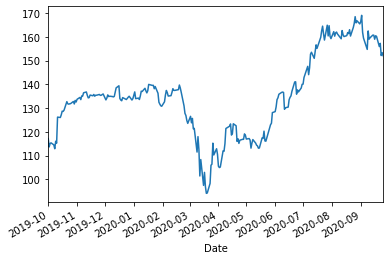

In [81]:
start = dt.datetime(2019,10,1)
end = dt.datetime(2020,9,25)

sap_stock = web.DataReader("SAP", "yahoo", start, end)
sap_stock.to_csv("sap_stock.csv") #Saving Stock Data as CSV

sap_stock["Close"].plot()

In [82]:
sap_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-01,118.120003,116.320000,118.120003,117.150002,799100.0,115.482826
2019-10-02,115.019997,112.940002,114.860001,113.660004,702700.0,112.042496
2019-10-03,115.269997,112.889999,114.050003,115.110001,505500.0,113.471863
2019-10-04,115.410004,114.430000,114.980003,115.370003,803700.0,113.728165
2019-10-07,115.050003,114.070000,114.070000,114.529999,637700.0,112.900116
...,...,...,...,...,...,...
2020-09-21,156.169998,153.169998,155.660004,155.880005,599900.0,155.880005
2020-09-22,157.320007,154.970001,156.369995,157.229996,361500.0,157.229996
2020-09-23,155.639999,151.830002,155.300003,152.110001,449500.0,152.110001


We are only interested in the *Open* and *Close* columns of the dataframe to calculate whether the stock price went up or down, I am dropping the columns that are not interesting:

In [83]:
sap_stock = sap_stock[["Open","Close"]]

In [84]:
sap_stock

,Open,Close
Date,,
2019-10-01,118.120003,117.150002
2019-10-02,114.860001,113.660004
2019-10-03,114.050003,115.110001
2019-10-04,114.980003,115.370003
2019-10-07,114.070000,114.529999
...,...,...
2020-09-21,155.660004,155.880005
2020-09-22,156.369995,157.229996
2020-09-23,155.300003,152.110001


In [85]:
sap_stock["Stock Movement"] = sap_stock["Open"] - sap_stock["Close"]

/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
sap_stock["Stock Movement"]

Date
2019-10-01    0.970001
2019-10-02    1.199997
2019-10-03   -1.059998
2019-10-04   -0.389999
2019-10-07   -0.459999
                ...   
2020-09-21   -0.220001
2020-09-22   -0.860001
2020-09-23    3.190002
2020-09-24   -0.479996
2020-09-25   -2.130005
Name: Stock Movement, Length: 250, dtype: float64

Now we turn the Stock Movement Variable into a binary variable:

In [87]:
sap_stock.loc[sap_stock['Stock Movement'] < 0, 'Stock Movement'] = 0
sap_stock.loc[sap_stock['Stock Movement'] > 0, 'Stock Movement'] = 1

/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
sap_stock

,Open,Close,Stock Movement
Date,,,
2019-10-01,118.120003,117.150002,1.0
2019-10-02,114.860001,113.660004,1.0
2019-10-03,114.050003,115.110001,0.0
2019-10-04,114.980003,115.370003,0.0
2019-10-07,114.070000,114.529999,0.0
...,...,...,...
2020-09-21,155.660004,155.880005,0.0
2020-09-22,156.369995,157.229996,0.0
2020-09-23,155.300003,152.110001,1.0


## Loading the Tweet Data

In [77]:
twitter_data = pd.read_csv("AlexanderAtzberger_tweets.csv")
twitter_data

,tweet_id,Likes,Retweets,Lenght,Followers
0,324243545,514.0,374.0,236.0,4762.0
1,324243546,743.0,187.0,171.0,8322.0
2,324243547,362.0,92.0,263.0,7573.0
3,324243548,155.0,55.0,219.0,4772.0
4,324243549,163.0,92.0,269.0,7915.0
...,...,...,...,...,...
9995,324253540,307.0,166.0,145.0,9227.0
9996,324253541,486.0,105.0,224.0,8778.0
9997,324253542,529.0,223.0,180.0,5261.0
9998,324253543,418.0,142.0,231.0,9384.0


## Loading the Sentiment Data

In [78]:
sentiment_data = pd.read_csv("AlexanderAtzberger_sentiment.csv")
sentiment_data

,tweet_id,positive,negative,neutral
0,324243545,5.0,-5.0,1.0
1,324243546,3.0,-3.0,1.0
2,324243547,5.0,-1.0,0.0
3,324243548,3.0,-5.0,0.0
4,324243549,3.0,NaN,NaN
...,...,...,...,...
9995,324253540,1.0,-5.0,0.0
9996,324253541,1.0,-3.0,0.0
9997,324253542,1.0,-1.0,1.0
9998,324253543,3.0,-3.0,0.0


First we merge the twitter and sentiment data together:

In [90]:
merged_dataset = pd.merge(left=twitter_data, right=sentiment_data, left_on='tweet_id', right_on='tweet_id')
merged_dataset

,tweet_id,Likes,Retweets,Lenght,Followers,positive,negative,neutral
0,324243545,514.0,374.0,236.0,4762.0,5.0,-5.0,1.0
1,324243546,743.0,187.0,171.0,8322.0,3.0,-3.0,1.0
2,324243547,362.0,92.0,263.0,7573.0,5.0,-1.0,0.0
3,324243548,155.0,55.0,219.0,4772.0,3.0,-5.0,0.0
4,324243549,163.0,92.0,269.0,7915.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...
9995,324253540,307.0,166.0,145.0,9227.0,1.0,-5.0,0.0
9996,324253541,486.0,105.0,224.0,8778.0,1.0,-3.0,0.0
9997,324253542,529.0,223.0,180.0,5261.0,1.0,-1.0,1.0
9998,324253543,418.0,142.0,231.0,9384.0,3.0,-3.0,0.0


As a last step before cleaning the data, I am adding the stock movement data to the dataframe:

In [92]:
sap_stock = sap_stock["Stock Movement"]

In [93]:
sap_stock.reset_index()

,Date,Stock Movement
0,2019-10-01,1.0
1,2019-10-02,1.0
2,2019-10-03,0.0
3,2019-10-04,0.0
4,2019-10-07,0.0
...,...,...
245,2020-09-21,0.0
246,2020-09-22,0.0
247,2020-09-23,1.0
248,2020-09-24,0.0


*Disclaimer*
To reach a meaningful sample, I tried my dataset as if the 10 board members averaged 40 tweets per day over the course of the year. In order to have a matching up/down stock score, I duplicated each stock row, and in a subsequent step appended it to the main data frame.

In [103]:
10000/250

40.0

In [104]:
sap_stock_duplicated = pd.DataFrame(np.repeat(sap_stock.values,40,axis=0))
sap_stock_duplicated 

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
9995,0.0
9996,0.0
9997,0.0
9998,0.0


In [122]:
finalframe = pd.merge(left=merged_dataset, right=sap_stock_duplicated, left_index=True, right_index=True)
finalframe

,tweet_id,Likes,Retweets,Lenght,Followers,positive,negative,neutral,0
0,324243545,514.0,374.0,236.0,4762.0,5.0,-5.0,1.0,1.0
1,324243546,743.0,187.0,171.0,8322.0,3.0,-3.0,1.0,1.0
2,324243547,362.0,92.0,263.0,7573.0,5.0,-1.0,0.0,1.0
3,324243548,155.0,55.0,219.0,4772.0,3.0,-5.0,0.0,1.0
4,324243549,163.0,92.0,269.0,7915.0,3.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...
9995,324253540,307.0,166.0,145.0,9227.0,1.0,-5.0,0.0,0.0
9996,324253541,486.0,105.0,224.0,8778.0,1.0,-3.0,0.0,0.0
9997,324253542,529.0,223.0,180.0,5261.0,1.0,-1.0,1.0,0.0
9998,324253543,418.0,142.0,231.0,9384.0,3.0,-3.0,0.0,0.0


In [123]:
finalframe["Stock Movement"] = finalframe[0]
finalframe

,tweet_id,Likes,Retweets,Lenght,Followers,positive,negative,neutral,0,Stock Movement
0,324243545,514.0,374.0,236.0,4762.0,5.0,-5.0,1.0,1.0,1.0
1,324243546,743.0,187.0,171.0,8322.0,3.0,-3.0,1.0,1.0,1.0
2,324243547,362.0,92.0,263.0,7573.0,5.0,-1.0,0.0,1.0,1.0
3,324243548,155.0,55.0,219.0,4772.0,3.0,-5.0,0.0,1.0,1.0
4,324243549,163.0,92.0,269.0,7915.0,3.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,324253540,307.0,166.0,145.0,9227.0,1.0,-5.0,0.0,0.0,0.0
9996,324253541,486.0,105.0,224.0,8778.0,1.0,-3.0,0.0,0.0,0.0
9997,324253542,529.0,223.0,180.0,5261.0,1.0,-1.0,1.0,0.0,0.0
9998,324253543,418.0,142.0,231.0,9384.0,3.0,-3.0,0.0,0.0,0.0


Now we can check for missing values:

In [129]:
finalframe.isna().sum()

tweet_id                   0
Likes                   1087
Retweets                1087
Lenght                  1087
Followers               1087
positive                1980
negative                1972
neutral                 1944
0                          0
Stock Movement             0
Aggregated Sentiment    3361
dtype: int64

We replace each NaN with a 0 to be able to conduct a meaningful analysis.

In [134]:
finalframe.fillna(0, inplace=True)
finalframe

,tweet_id,Likes,Retweets,Lenght,Followers,positive,negative,neutral,0,Stock Movement,Aggregated Sentiment
0,324243545,514.0,374.0,236.0,4762.0,5.0,-5.0,1.0,1.0,1.0,1.0
1,324243546,743.0,187.0,171.0,8322.0,3.0,-3.0,1.0,1.0,1.0,1.0
2,324243547,362.0,92.0,263.0,7573.0,5.0,-1.0,0.0,1.0,1.0,4.0
3,324243548,155.0,55.0,219.0,4772.0,3.0,-5.0,0.0,1.0,1.0,-2.0
4,324243549,163.0,92.0,269.0,7915.0,3.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,324253540,307.0,166.0,145.0,9227.0,1.0,-5.0,0.0,0.0,0.0,-4.0
9996,324253541,486.0,105.0,224.0,8778.0,1.0,-3.0,0.0,0.0,0.0,-2.0
9997,324253542,529.0,223.0,180.0,5261.0,1.0,-1.0,1.0,0.0,0.0,1.0
9998,324253543,418.0,142.0,231.0,9384.0,3.0,-3.0,0.0,0.0,0.0,0.0


In [135]:
finalframe.isna().sum()

tweet_id                0
Likes                   0
Retweets                0
Lenght                  0
Followers               0
positive                0
negative                0
neutral                 0
0                       0
Stock Movement          0
Aggregated Sentiment    0
dtype: int64

In [249]:
finalframe.dtypes

tweet_id                  int64
Likes                   float64
Retweets                float64
Lenght                  float64
Followers               float64
positive                float64
negative                float64
neutral                 float64
0                       float64
Stock Movement          float64
Aggregated Sentiment    float64
dtype: object

Now the data set does not include any missing values, as a next step I aggregate the sentiment

In [136]:
finalframe['Aggregated Sentiment'] = finalframe['negative'] + finalframe['positive']+ finalframe['neutral']
finalframe.head()

,tweet_id,Likes,Retweets,Lenght,Followers,positive,negative,neutral,0,Stock Movement,Aggregated Sentiment
0,324243545,514.0,374.0,236.0,4762.0,5.0,-5.0,1.0,1.0,1.0,1.0
1,324243546,743.0,187.0,171.0,8322.0,3.0,-3.0,1.0,1.0,1.0,1.0
2,324243547,362.0,92.0,263.0,7573.0,5.0,-1.0,0.0,1.0,1.0,4.0
3,324243548,155.0,55.0,219.0,4772.0,3.0,-5.0,0.0,1.0,1.0,-2.0
4,324243549,163.0,92.0,269.0,7915.0,3.0,0.0,0.0,1.0,1.0,3.0


The final data frame is now clean, merged and ready to further explore in the next section.

## Data Exploration & Evaluation

The following independent variables and dependent variables are being examined for this analysis: <br>

IV: Aggrgated Sentiment: the final sentiment score of each tweet<br>
IV: Likes: how many likes each tweet received <br>
IV: Retweets: how many retweets each tweet received <br>
IV: Followers: how many followers each board member had <br>
IV: Length: how many characters were used per tweet <br>
DV: Stock Market Movement: Whether the stock went up or down

First we look at the Independent variables used for this analysis. The IV's in this case are Aggregated Sentiment, tweet likes, tweet retweets, account followers and length of tweet. Below I display the descriptive statistics of each independent variable and visualize them.

In [181]:
finalframe["Aggregated Sentiment"].describe()

count   10000.000
mean        0.086
std         2.183
min        -6.000
25%        -1.000
50%         0.000
75%         1.000
max         6.000
Name: Aggregated Sentiment, dtype: float64

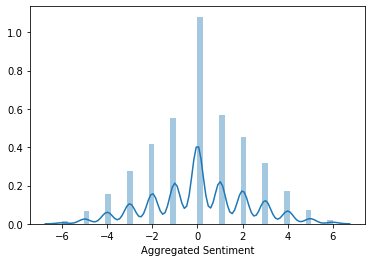

In [293]:
sns.distplot(finalframe["Aggregated Sentiment"])

In [251]:
finalframe["Likes"].describe()

count   10000.000
mean      492.943
std       298.301
min         0.000
25%       251.000
50%       499.000
75%       749.000
max       999.000
Name: Likes, dtype: float64

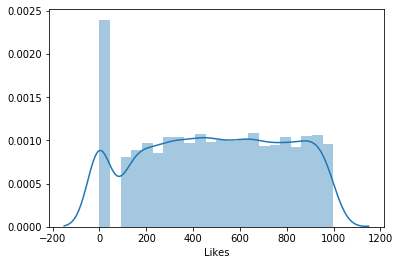

In [292]:
sns.distplot(finalframe["Likes"])

In [252]:
finalframe["Retweets"].describe()

count   10000.000
mean      177.760
std       117.580
min         0.000
25%        87.000
50%       163.000
75%       260.000
max       498.000
Name: Retweets, dtype: float64

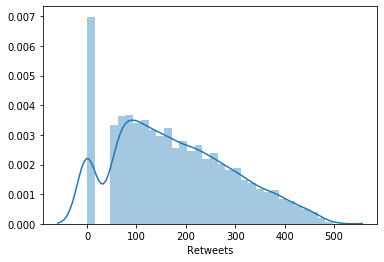

In [297]:
sns.distplot(finalframe["Retweets"])

In [253]:
finalframe["Followers"].describe()

count   10000.000
mean     6037.056
std      3039.168
min         0.000
25%      4092.250
50%      6741.500
75%      8570.000
max      9999.000
Name: Followers, dtype: float64

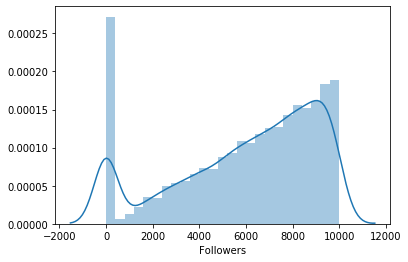

In [294]:
sns.distplot(finalframe["Followers"])

In [254]:
finalframe["Lenght"].describe()

count   10000.000
mean      164.563
std        80.604
min         0.000
25%       118.000
50%       183.000
75%       231.000
max       269.000
Name: Lenght, dtype: float64

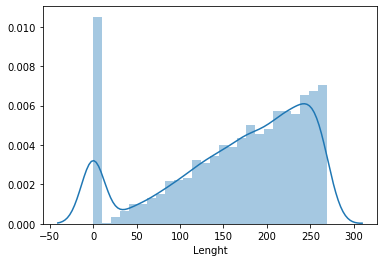

In [295]:
sns.distplot(finalframe["Lenght"])

Now for the dependent variable Stock Movement:

In [246]:
finalframe["Stock Movement"].describe()

count   10000.000
mean        0.456
std         0.498
min         0.000
25%         0.000
50%         0.000
75%         1.000
max         1.000
Name: Stock Movement, dtype: float64

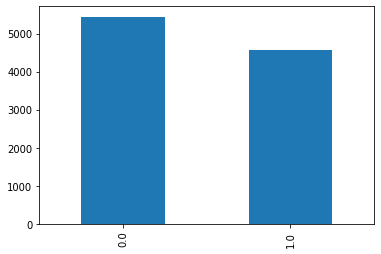

In [257]:
finalframe["Stock Movement"].value_counts().plot(kind='bar')

## Bivariate Visualisation

H1

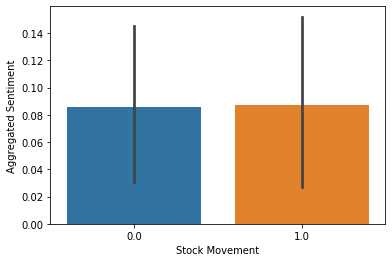

In [299]:
sns.barplot(x='Stock Movement', y='Aggregated Sentiment', data=finalframe)

H2 Exectuvies with a larger reach are more likely to affect the stock market price compared to board members with a smaller reach.

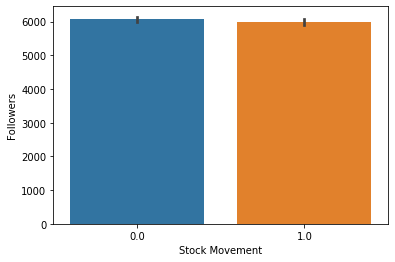

In [305]:
sns.barplot(x='Stock Movement', y='Followers', data=finalframe)

H3 Longer tweets stock market price positively, whereas short tweets negatively impact stock market price.

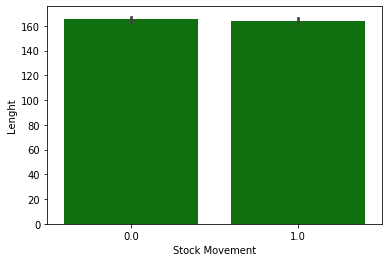

In [304]:
sns.barplot(x='Stock Movement', y='Lenght', data=finalframe, color='green')

As we can see, the collected dataset includes an imbalanced set of observations. Aggregated sentiment appears to have a very balanced score, whereas the rest of the independent variables all are either scewed to the left or right. Also the dependent variable has an inherent imbalance: the data set includes more "stock down" scores than "stock up". As for the model, we potentially run into the danger of being better to explain stock movement down rather than up.

# Modelling & Hypothesis Testing

## H1: The more positive the tweets of a board member are, the more positively they affects the stock market price in comparison to negative sentiment

In [143]:
logit_stats = sm.Logit(finalframe['Stock Movement'], sm.add_constant(finalframe[['Aggregated Sentiment']]))

/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [144]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.689270
         Iterations 3


In [145]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:         Stock Movement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:               1.545e-07
Time:                        18:03:57   Log-Likelihood:                -6892.7
converged:                       True   LL-Null:                       -6892.7
Covariance Type:            nonrobust   LLR p-value:                    0.9632
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1765      0.020     -8.784      0.000      -0.216      -0.137
Aggregated Sentiment     0.0004      0.009      0.046      0.963      -0.018       0.018


## H2: Board members with a larger reach are more likely to affect the stock market price compared to board members with a smaller reach.

In [146]:
logit_stats = sm.Logit(finalframe['Stock Movement'], sm.add_constant(finalframe[["Likes","Retweets","Followers"]]))

In [147]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.689175
         Iterations 3


In [148]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:         Stock Movement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:               0.0001382
Time:                        18:06:25   Log-Likelihood:                -6891.7
converged:                       True   LL-Null:                       -6892.7
Covariance Type:            nonrobust   LLR p-value:                    0.5924
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1150      0.050     -2.286      0.022      -0.214      -0.016
Likes      -8.734e-06   7.49e-05     -0.117      0.907      -0.000       0.000
Retweets   -9.994e-05      0.000     -0.536      0.5

## H3: Longer tweets stock market price positively, whereas short tweets negatively impact stock market price.

In [149]:
logit_stats = sm.Logit(finalframe['Stock Movement'], sm.add_constant(finalframe[['Lenght']]))

In [150]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.689225
         Iterations 3


In [151]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:         Stock Movement   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:               6.615e-05
Time:                        18:08:01   Log-Likelihood:                -6892.2
converged:                       True   LL-Null:                       -6892.7
Covariance Type:            nonrobust   LLR p-value:                    0.3396
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1373      0.046     -3.012      0.003      -0.227      -0.048
Lenght        -0.0002      0.000     -0.955      0.340      -0.001       0.000


## Predictive Analytics

In [161]:
train, test = train_test_split(finalframe, test_size=0.2, random_state=42)

In [162]:
train.head()

,tweet_id,Likes,Retweets,Lenght,Followers,positive,negative,neutral,0,Stock Movement,Aggregated Sentiment
9254,324252799,275.000,94.000,89.000,4616.000,1.000,-1.000,0.000,1.000,1.000,0.000
1561,324245106,670.000,227.000,112.000,9344.000,2.000,-5.000,-1.000,1.000,1.000,-4.000
1670,324245215,428.000,378.000,190.000,7024.000,5.000,-1.000,0.000,0.000,0.000,4.000
6087,324249632,717.000,267.000,116.000,5304.000,4.000,-5.000,0.000,0.000,0.000,-1.000
6669,324250214,0.000,0.000,0.000,0.000,5.000,-5.000,0.000,0.000,0.000,0.000


In [163]:
len(train)

8000

In [164]:
len(test)

2000

In [166]:
len(finalframe), len(train), len(test), len(train) / len(finalframe), len(test) / len(finalframe)

(10000, 8000, 2000, 0.8, 0.2)

For SML, I will test a model to see if we can predict stock market movement based on the features sentiment,tweet length, likes, retweets and account followers.

In [227]:
target = "Stock Movement"
features = ['Aggregated Sentiment','Likes','Retweets','Followers','Lenght']

In [228]:
logit_stats = sm.Logit(train[target], sm.add_constant(train[features]))

/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [229]:
result_logit = logit_stats.fit()

Optimization terminated successfully.
         Current function value: 0.689644
         Iterations 3


In [230]:
print(result_logit.summary())

                           Logit Regression Results                           
Dep. Variable:         Stock Movement   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7994
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Oct 2020   Pseudo R-squ.:               0.0001087
Time:                        16:05:39   Log-Likelihood:                -5517.2
converged:                       True   LL-Null:                       -5517.8
Covariance Type:            nonrobust   LLR p-value:                    0.9449
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1100      0.059     -1.858      0.063      -0.226       0.006
Aggregated Sentiment    -0.0018      0.010     -0.175      0.861      -0.022       0.018
Likes       

In [231]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [232]:
features

['Aggregated Sentiment', 'Likes', 'Retweets', 'Followers', 'Lenght']

In [233]:
target

'Stock Movement'

In [234]:
logit_clf.fit(train[features], train[target])

/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [306]:
logit_clf.predict_proba([[1,1,1,0,0]])

array([[0.50005305, 0.49994695]])

In [236]:
logit_clf.predict_proba([[0,0,1,1,1]])

array([[0.50011811, 0.49988189]])

## Performance Test of SML Model

In [237]:
test['predicted_bounce_logit'] = logit_clf.predict(test[features])

/Users/i507303/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
test['predicted_bounce_logit'].value_counts()

0.000    1953
1.000      47
Name: predicted_bounce_logit, dtype: int64

In [239]:
test[['Stock Movement', 'predicted_bounce_logit']].head()

,Stock Movement,predicted_bounce_logit
6252,0.000,0.000
4684,0.000,0.000
1731,1.000,0.000
4742,1.000,0.000
4521,0.000,0.000


In [242]:
print(confusion_matrix(test['Stock Movement'], test['predicted_bounce_logit']))

[[1085   24]
 [ 868   23]]


In [245]:
print(classification_report(test['Stock Movement'], test['predicted_bounce_logit']))

              precision    recall  f1-score   support

         0.0       0.56      0.98      0.71      1109
         1.0       0.49      0.03      0.05       891

    accuracy                           0.55      2000
   macro avg       0.52      0.50      0.38      2000
weighted avg       0.53      0.55      0.41      2000



## Evaluation

Examining the analysis, it becomes evident that the analysis does not yield any significant results. To answer the initial research question, <b> we did not find that tweets can predict stock market movement.</b>
In the section below I discuss the findings and suggest to SAP what they mean and how they can use the results. First, I evaluate the statistical test, then the predictive test and lastly the results of the machine learning.<br>

<b>Statistical Test</b><br>
*H1*<br>
First we examine the first hypothesis, whether sentiment of tweets (IV) affects the stock market movement of SAP (DV). The pseudo R-square for this model is 1.55. This indicates that that the independent variable is not explaining much in the variation of the dependent variable. Further, the p value indicates the insignificant effect: p=.34.<br>
*H2*<br>
The second hypothesis examined whether amount of followers, tweet likes and retweets (IV) affect the stock market movement of SAP (DV). The pseudo R-square for this model is 0.0001. This finding indicates an even less substantial finding than the aggregated sentiment. Of the three predictors, followers appear to be able to explain the model the best, p=0.384, whereas retweets (p=0.592) and likes (p=0.907) have not shown any promising results.<br>
*H3*<br>
The last hypothesis examined whether the tweet length (IV) affect the stock market movement of SAP (DV). The pseudo R-square for this model is 6.615e-05. This finding also yields results that do not explain the variation on the stock movement based on the length of tweets, p=0.340<br>
We accept all three null hypotheses and confirm that there is no significant effect of the selected characteristics of the tweets on stock movement data.

<b>Predictive Analytics</b><br>
To test the movement in stock data, I tested a model that included all predictors that were seperately tested via the hypotheses. This would be exploratory and potentially explain which factor could best predict the movement in stock data. Unfortunately, the results yield no meaningful results again. The pseudo-rsquare is not meaningful R2=0.0001087, explaining that the predictors do not explain any variation in the dependent variable.

<b>Evaluation of SML</b><br>
Lastly, we examine the Precision/Recall and F1 score of the conducted Supervised Machine Learning Model to see if we can accurately predict stock movement data based on the factors we introduced earlier. Overall, the F1 score is poor to moderate, F1=0.55. The model was equally poor in selecting relevant items(precision) to identify when stock movement would go up or down. With regards to recall, the model was good at selecting relevant cases for stock going down (.98), and extremely bad at identifying relevant cases for stock going up. The model is good in classifying the stock down tweets, yet bad at identifying the stock up tweets. For the model to make meaningful predictions, we would need a more balanced model that manages to classify the stock up tweets as well.

<b>What does this mean for SAP?</b><br>
To round up the discussion of the findings, I can confirm that Tweets appear to not have a meaningful effect on the stock movement of the organisation. After examining 10000 tweets over the course of one year, the factors amount of likes, retweets, account followers, sentiment and tweet length appear not to influence the trust and financial support that shareholders put into the organisation. That is both positive and negative: on the one hand, it appears that all executive board members do not produce controversial tweets that lead to potential pr scandals, which does not divert the attention from the quality products. On the other hand, the board members external communication on social media appear to be evaluated as not influential by the general public.

## Limitations and Next Steps

A number of limitations follow the presented analysis. The first one being that this analysis only examined the tweets of board members of one organisation. In this particular case, the executive board members potentially are not producing twitter content that wins over or polarises their followers. SAP is a traditional German organisation, which is not particularly known to be innovative and cutting edge, which most likely extends to the communication of its executives. For that matter, it is a strong possibility that people that evaluate the stock market price of SAP do not take the social media activity of the board members into account. As mentioned before, this is not necessarily a bad thing. This finding means that there is a strong alignment between between the messaging and moderate tweet output of the organisations executives.<br>
A second limitation in this case is looking at tweets of people coming out of one single organisation. The twitter handles of the executives might all be operated by their executive assistants to be representative, yet strict in line with the external communication strategy of the organisation. To examine multiple board members across multiple organisations would have overextended the scope of this research project, yet would be very interesting compare in future work. <br>
Future research should examine exeuctives across multiple industries to see whether there are meaningful differences. Leaders from different organisations potentially have a substantial effect on the stock market by distributing content that is more polarising. <br>
As for SAP, I would suggest to raise awareness of the potential link between stock market price and the tweets that are being produced by board members. Executives could be trained to use Twitter to its full potential and learn how to find their share of voice. Additionally, I would encourage to refine the presented research to stay on top of the potential link between tweets and stock price and monitor it. This way no surprising new algorithms would harm the stock price of the organisation.

## Ethical and Normative Considerations

Despite finding no relevant effect of Twitter affecting stock market, recent literature has found evidence for the rise of the *personal brand*, its communication and subsequent effect on the organisation that people represent (Harris & Rae, 2011), the effect of personal branding efforts of top executives (Karaduman, 2013), and the effect of social media sentiment on stock market price (Derakhshan & Beigy, 2019). Despite not finding any clear evidence, it is apparent that social media is moving to the forefront of external communication, and executives need to be aware of the impact that they are having on the financial evaluation of the organisations that they represent. Executives need to understand that they are one of the key channels that communicates the values, norms and beliesf of their organisations via social media directly to the consumers.<br>
Additionally, the way to evaluate text data will become more refined as the technology and methods of researchers gets better. In this case, the analysis did not yield any insightful results, yet this is merely a question of time. In the near future it will be possible to find a causal link between tweets and stock price data. In this case, public organisations will run into the situation that external algorithms can anticipate stock movement and trade via their predictions. In an extreme scenario, this might make an organisation dependent on the predictive algorithms that trade, short and option their stock. This would directly violate the technical robustness and safety of organisations (Boyd & Crawford, 2012) exposing them to mechanisms that they cannot control which make money off of them. It is difficult to control, because both the finance data of organisations is public, as well as the tweets of executives. Yet the European Union needs to monitor and closely examine trading platforms to identify peculiar trades and sudden and constant successes, as a potential algorithm might be doing the trading. One way to do so is to subscribe and take accountability to monitor trading platforms against the illegal development of trading algorithms (Martin, 2018). <br>
This is a very extreme and dystopian example, yet it leads to the overarching point that is important when doing ethical and normative considerations with regards to AI: Human agency and oversight. Only by monitoring the emergence of AI and algorithms we are able to see them before they cause damage or an unwanted effect. It is an imperative that bodies such as the European Unions dedicate time and effort to examine emerging patterns and analyse their impact, reach and potential harm. On the other hand, as Zubroff (2015) suggested, if the EU is not transparent and open about their surveillance, they might run into the procedures of surveillance capitalism, which challenges democratic norms and departs in central ways from the evolution of market capitalism. <br>
Change is the only constant, and the way for organisations to stay competitive is to identify the ever changing environments that shape their arenas, as do governmental functions and their scope of responsibility. After all, who is watching the watchers?

## References

Bollen, J., Mao, H., & Zeng, X. (2011). Twitter mood predicts the stock market. *Journal of computational science, 2*(1), 1-8.

Boyd, D. & Crawford, K. (2012). Critical questions for big data. *Information, Communication & Society, 15*(5), 662–679.

Desjardins, J. (2016) All of the World’s Stock Exchanges by Size. Retrieved from http://money.visualcapitalist.com/all-of-the-worlds-stock-exchanges-by-size/

Hamilton, J. T., & Zeckhauser, R. (2004). Media coverage of CEOs: who? what? where? when? why?. *Unpublished working paper, Stanford Institute of International Studies.*

Harris, L., & Rae, A. (2011). Building a personal brand through social networking. *Journal of Business Strategy, 9*(4), 1-19.

Karaduman, I. (2013). The effect of social media on personal branding efforts of top level executives. *Procedia-social and behavioral sciences, 99*(4), 465-473.

Liu, B. (2012). Sentiment analysis and opinion mining. *Synthesis lectures on human language technologies, 5*(1), 1-167.

Martin, K. (2018). Ethical Implications and Accountability of Algorithms. *Journal of Business Ethics, 160*(4), 835–850.

Mayo, M. (2014). A Clustering Analysis of Tweet Length and its Relation to Sentiment. *Unpublished working paper, Stanford Institute of Computational Science.*

Siddiqui, F. (2020). Tesla stock plummets more than 10 percent after Elon Musk tweets valuation is ‘too high’. Retrieved from https://www.washingtonpost.com/technology/2020/05/01/musk-tesla-stock/ 

Suh, B., Hong, L., Pirolli, P., & Chi, E. H. (2010). Want to be retweeted? large scale analytics on factors impacting retweet in twitter network. *IEEE Second International Conference on Social Computing, 1*(8),177-184).

Tweetbinder (n.d.). How to calculate Twitter impressions and reach. Retrieved from https://www.tweetbinder.com/blog/twitter-impressions/

Zhang, X., Fuehres, H., & Gloor, P. A. (2011). Predicting stock market indicators through twitter “I hope it is not as bad as I fear”. *Procedia-Social and Behavioral Sciences, 26*(1), 55-62.

Zuboff, S. (2015). Big other: Surveillance Capitalism and the Prospects of an Information Civilization. *Journal of Information Technology, 30*(1), 75–89.